In [1]:
import sys
from numpy import linspace
from scipy.integrate import odeint
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [2]:
# https://stackoverflow.com/questions/23578596/solve-an-implicit-ode-differential-algebraic-equation-dae
def integral(y, _, F_l, M, cache=[0]):
    v, preva = y[1], cache[0]
    #use value for 'a' from the previous timestep
    F_r = (((1 - preva) / 3) ** 2 + (2 * (1 + preva) / 3) ** 2) * v 
    #calculate the new value
    a = (F_l - F_r) / M
    cache[0] = a
    return [v, a]

y0 = [0, 5]
time = linspace(0., 10., 1000)
F_lon = 100.
mass = 1000.
y_calc = odeint(integral, y0, time, args=(F_lon, mass))

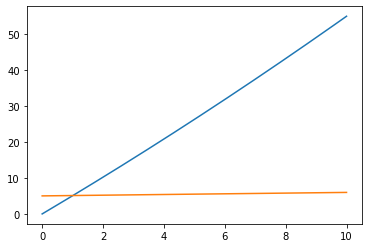

In [3]:
plt.plot(time,y_calc)

In [4]:
y0 = [0, 5]
time = linspace(0., 10., 1000)
F_lon = 10.
mass = 1000.

def F_r(a, v):
    return (((1 - a) / 3) ** 2 + (2 * (1 + a) / 3) ** 2) * v

def constraint(a, v):
    return (F_lon - F_r(a, v)) / mass - a

def integral(y, _):
    v = y[1]
    a, _, ier, mesg = fsolve(constraint, 0, args=[v, ], full_output=True)
    if ier != 1:
        print("I coudn't solve the algebraic constraint, error:\n\n", mesg)
        sys.stdout.flush()
    return [v, a]

y_calc = odeint(integral, y0, time)

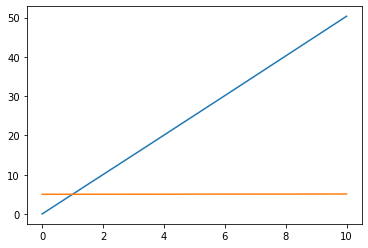

In [5]:
plt.plot(time,y_calc)